In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from plotting_utils import set_fontsize, render_in_latex, get_project_runs, filter_runs, plot_runs

In [3]:
criteria1 = {
    "optimizer": lambda run: run.config["opt"] == "askotchv2"
}
criteria2 = {
    "optimizer": lambda run: run.config["opt"] == "askotchv2",
    "accelerated": lambda run: run.config["accelerated"],
    "sampling": lambda run: run.config["sampling_method"] == "uniform",
}
criteria3 = {
    "optimizer": lambda run: run.config["opt"] == "pcg",
    "precision": lambda run: run.config["precision"] == "float64",
}
criteria4 = {
    "optimizer": lambda run: run.config["opt"] == "pcg",
    "precision": lambda run: run.config["precision"] == "float64",
}

In [4]:
datasets = {
    "qm9": {
        "ylim1": [0.0, 0.1],
        "ylim2": [0.0, 2.0],
        "metric": "test_smape",
    },
    "yearpredictionmsd": {
        "ylim1": [0.0, 0.5],
        "ylim2": [0.0, 2.0],
        "metric": "test_smape",
    },
    "toluene": {
        "ylim1": [0.0, 0.5],
        "ylim2": [0.0, 2.0],
        "metric": "test_smape",
    },
    "miniboone": {
        "ylim1": [0.85, 0.95],
        "ylim2": [0.85, 0.95],
        "metric": "test_acc",
    },
    "svhn": {
        "ylim1": [0.9, 1.0],
        "ylim2": [0.9, 1.0],
        "metric": "test_acc",
    },
    "santander": {
        "ylim1": [0.85, 0.95],
        "ylim2": [0.85, 0.95],
        "metric": "test_acc",
    },
}
# datasets = {
#     "qm9": {
#         "ylim1": [0.0, 1.0],
#         "ylim2": [0.0, 1.0],
#         "metric": "rel_residual",
#     },
#     "yearpredictionmsd": {
#         "ylim1": [0.0, 1.0],
#         "ylim2": [0.0, 1.0],
#         "metric": "rel_residual",
#     },
#     "toluene": {
#         "ylim1": [0.0, 1.0],
#         "ylim2": [0.0, 1.0],
#         "metric": "rel_residual",
#     },
#     "miniboone": {
#         "ylim1": [0.0, 1.0],
#         "ylim2": [0.0, 1.0],
#         "metric": "rel_residual",
#     },
#     "svhn": {
#         "ylim1": [0.0, 1.0],
#         "ylim2": [0.0, 1.0],
#         "metric": "rel_residual",
#     },
#     "santander": {
#         "ylim1": [0.0, 1.0],
#         "ylim2": [0.0, 1.0],
#         "metric": "rel_residual",
#     },
# }

fontsize = 14
entity_name = "sketchy-opts"

x_axis = "time"
hparams_to_label = {
    "askotchv2": ["r", "precond", "sampling_method"],
    "pcg": ["r", "precond", "m"]
}

In [5]:
set_fontsize(fontsize)

# # Render plots in LaTeX
# render_in_latex()

In [6]:
def plot_runs_dataset(entity_name, dataset, criteria1, criteria2, criteria3, hparams_to_label, metric, x_axis, ylim1, ylim2):
    entity_name = "sketchy-opts"
    project_name = f"performance_full_krr_{dataset}"
    save_dir = f"./plots/{dataset}"
    extension = ".pdf"

    runs_full_krr = get_project_runs(entity_name, project_name)
    runs_filtered1 = filter_runs(runs_full_krr, criteria1)
    runs_filtered2 = filter_runs(runs_full_krr, criteria2)
    runs_filtered3 = filter_runs(runs_full_krr, criteria3)

    plot_runs(runs_filtered1, hparams_to_label, metric, x_axis, ylim1, dataset, save_dir, f"askotch_all_{metric}{extension}")
    plot_runs(runs_filtered2 + runs_filtered3, hparams_to_label, metric, x_axis, ylim2, dataset, save_dir, f"askotch_vs_pcg_{metric}{extension}")

/home/pratikr/fast_krr/src/plotting/plotting_utils.py:282: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)
/home/pratikr/fast_krr/src/plotting/plotting_utils.py:282: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)
/home/pratikr/fast_krr/src/plotting/plotting_utils.py:282: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)
/home/pratikr/fast_krr/src/plotting/plotting_utils.py:282: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)
/home/pratikr/fast_krr/src/plotting/plotting_utils.py:282: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)
/home/pratikr/fast_krr/src/plotting/plotting_utils.py:282: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(ylim)


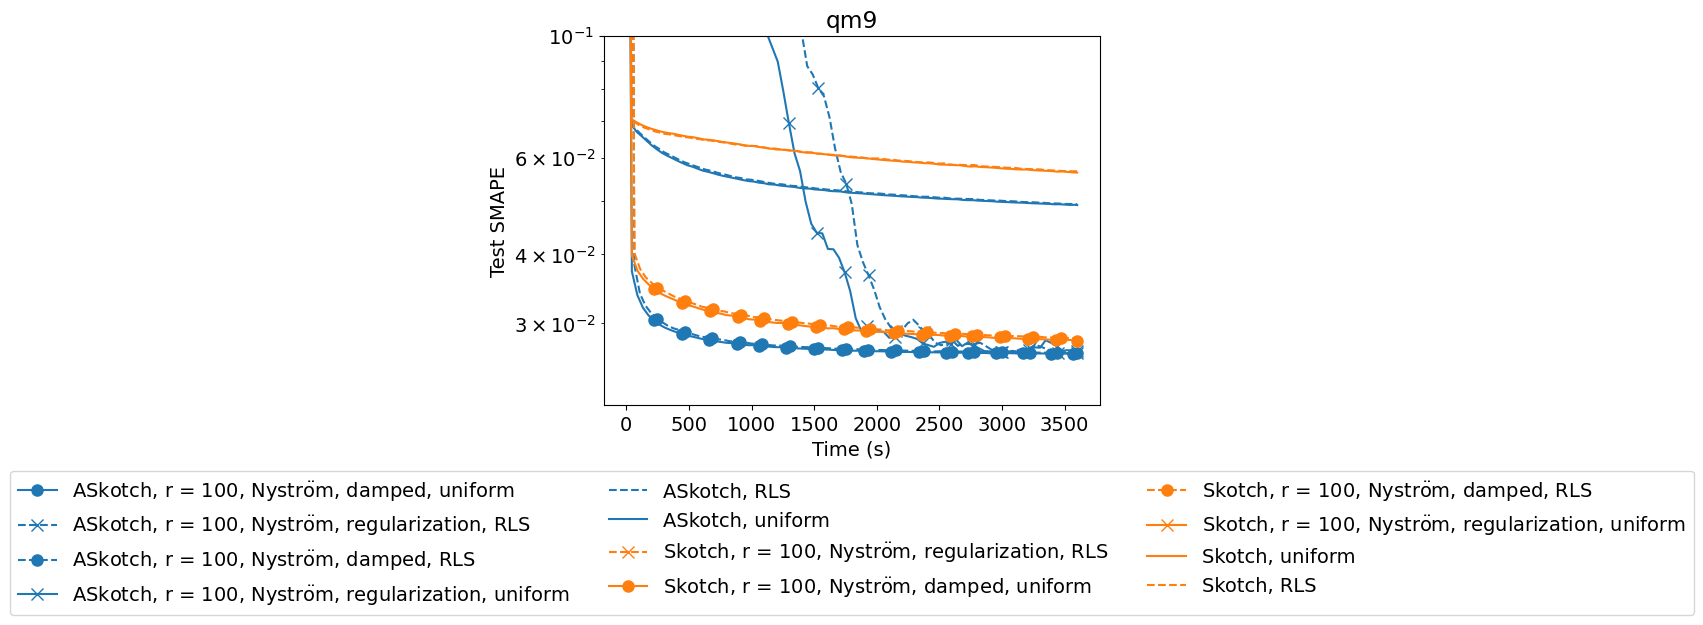

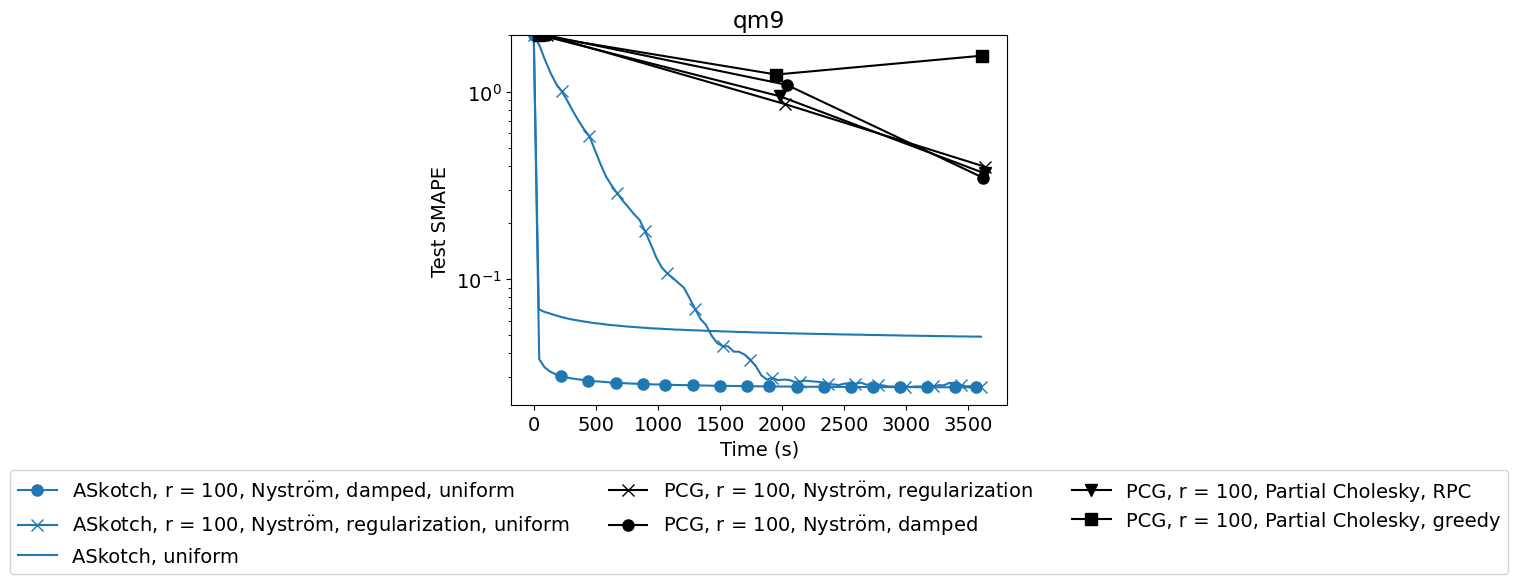

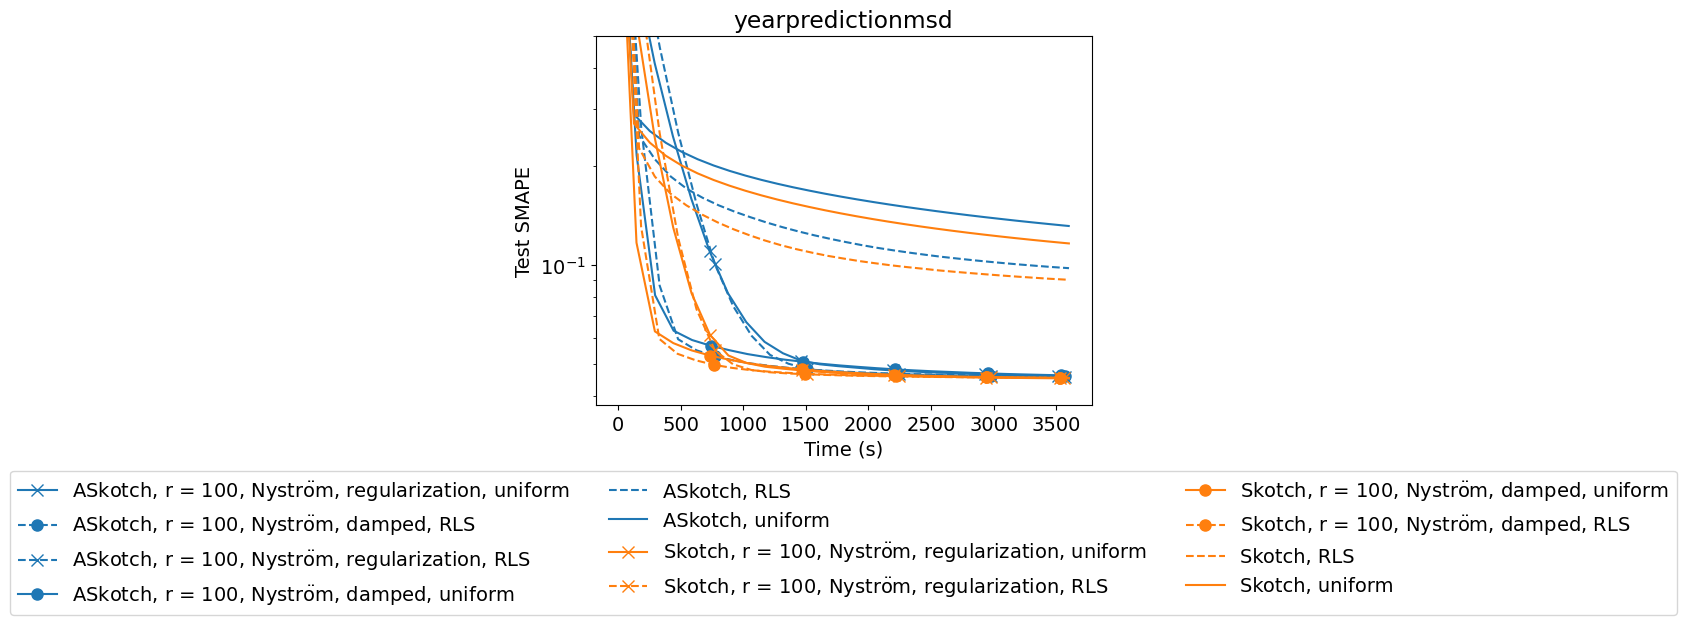

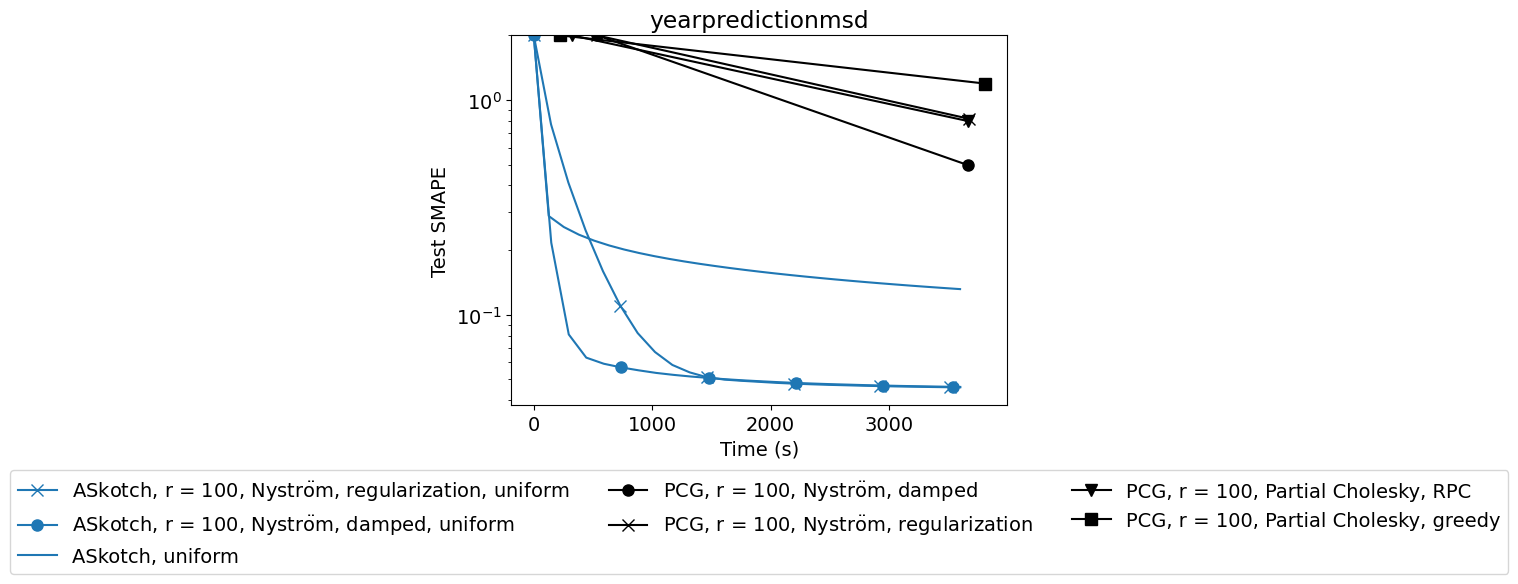

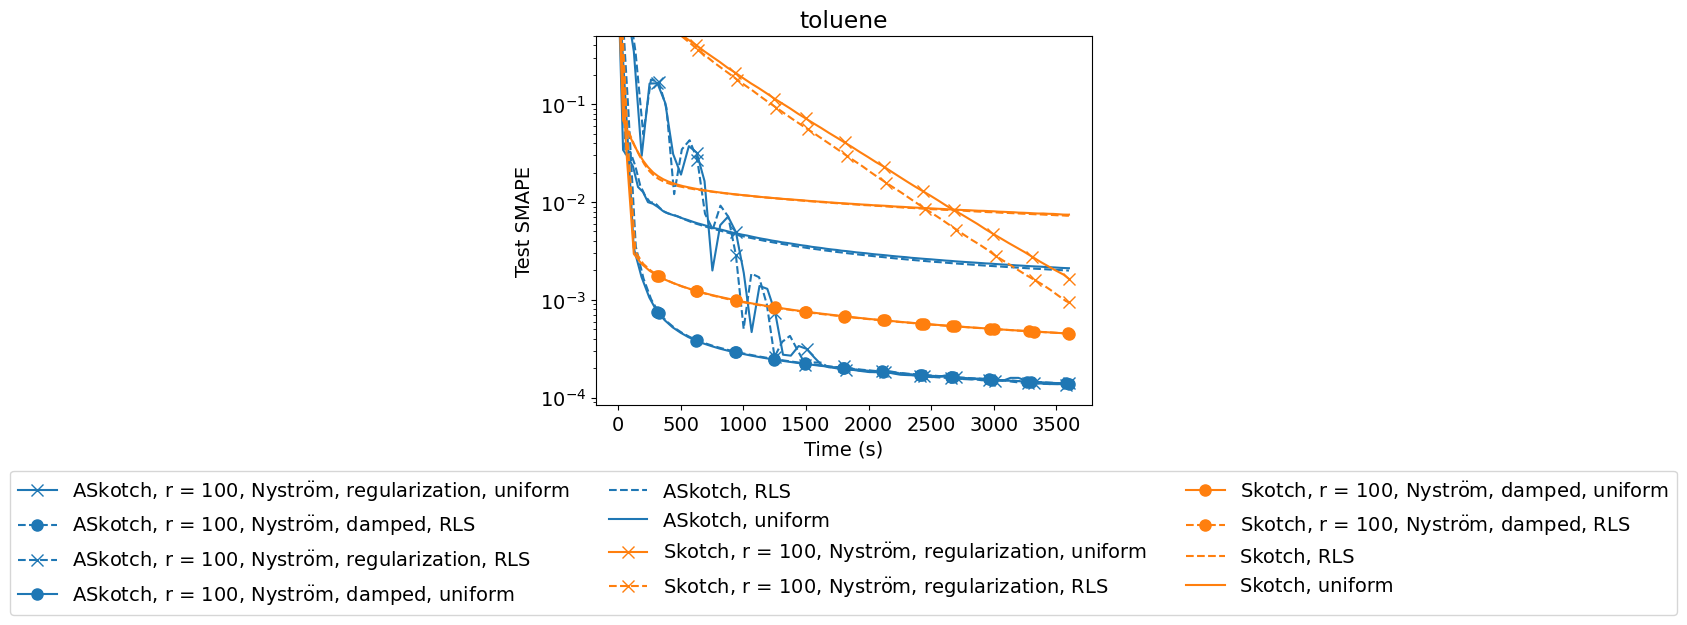

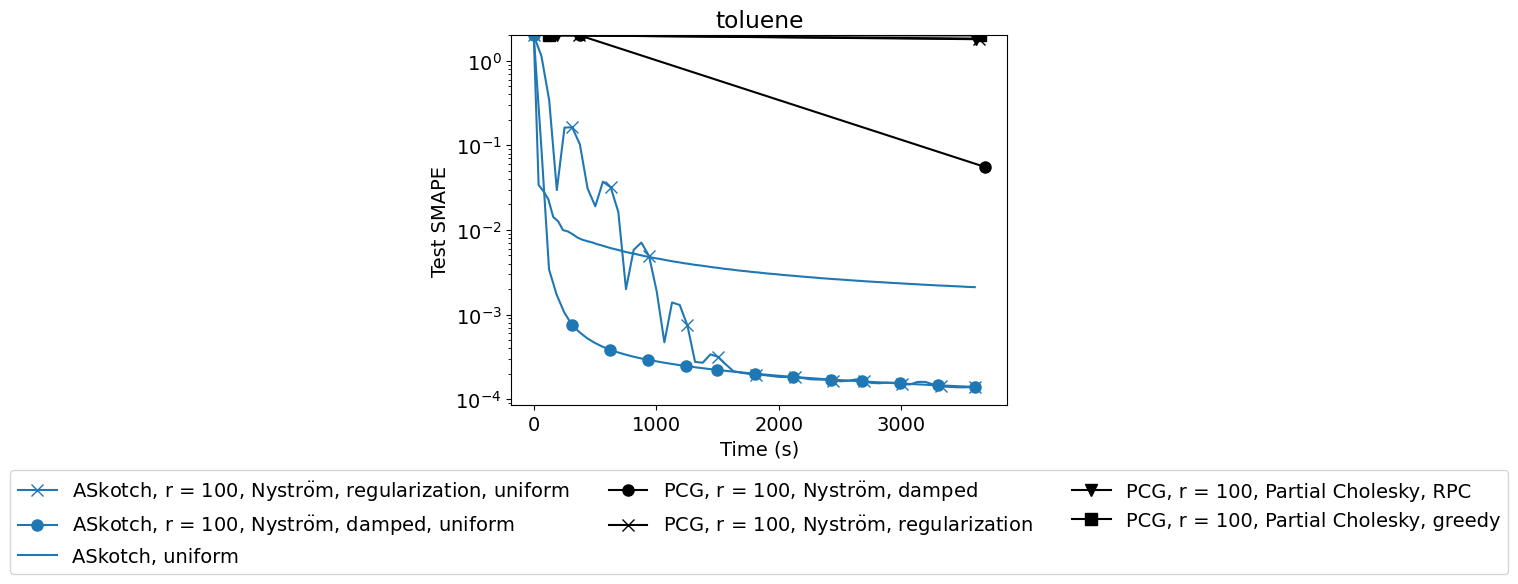

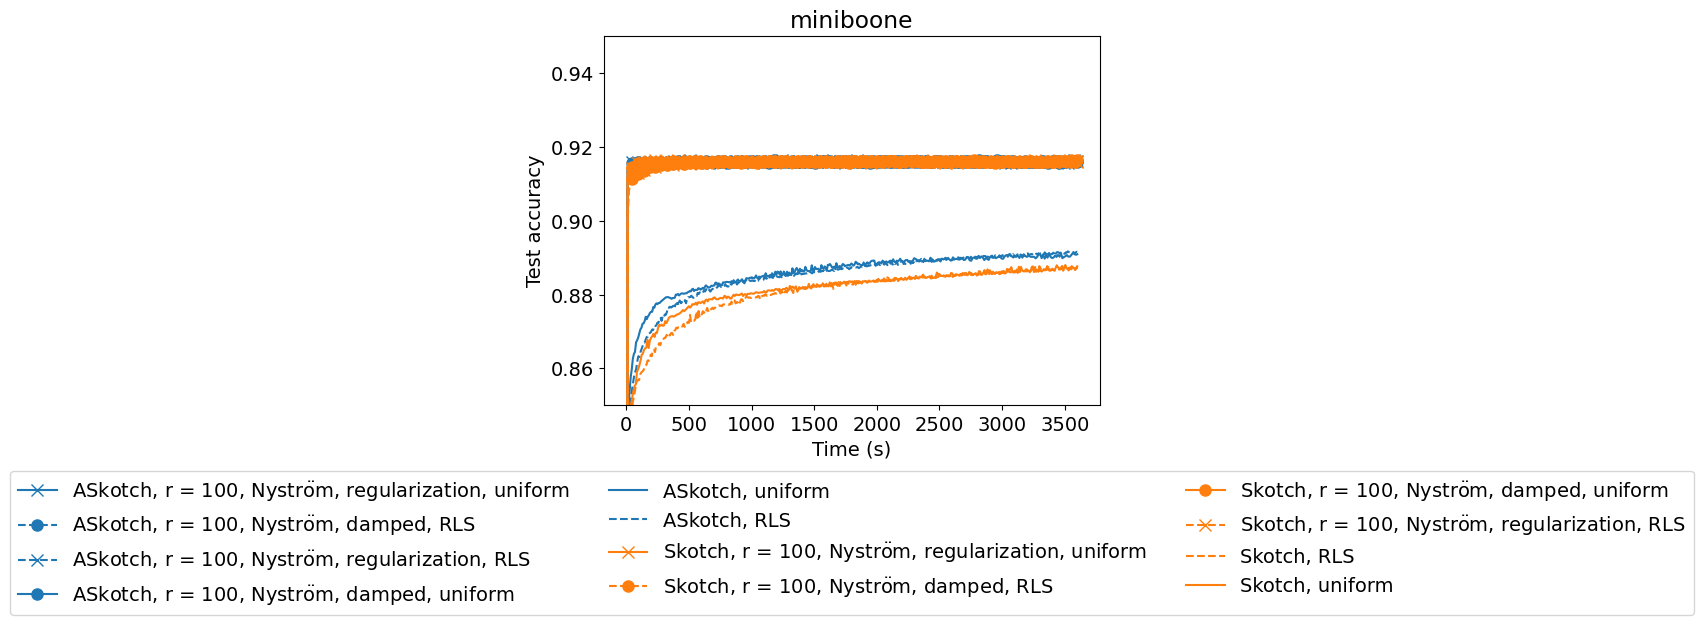

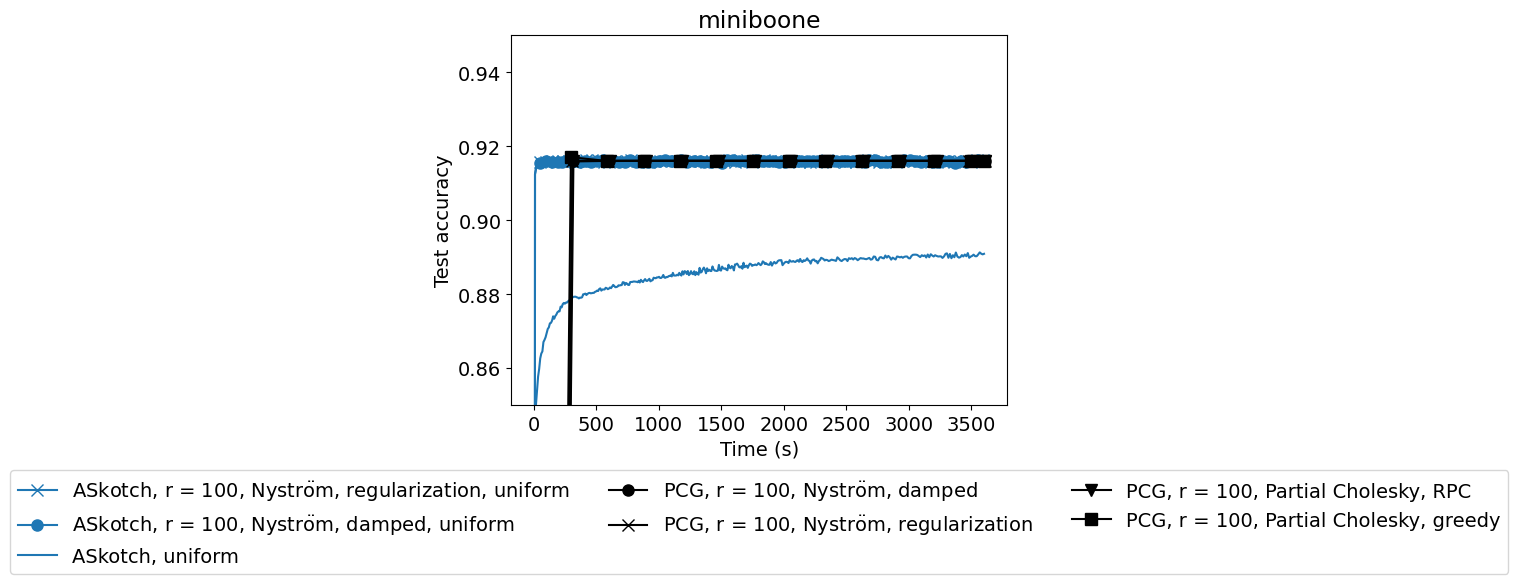

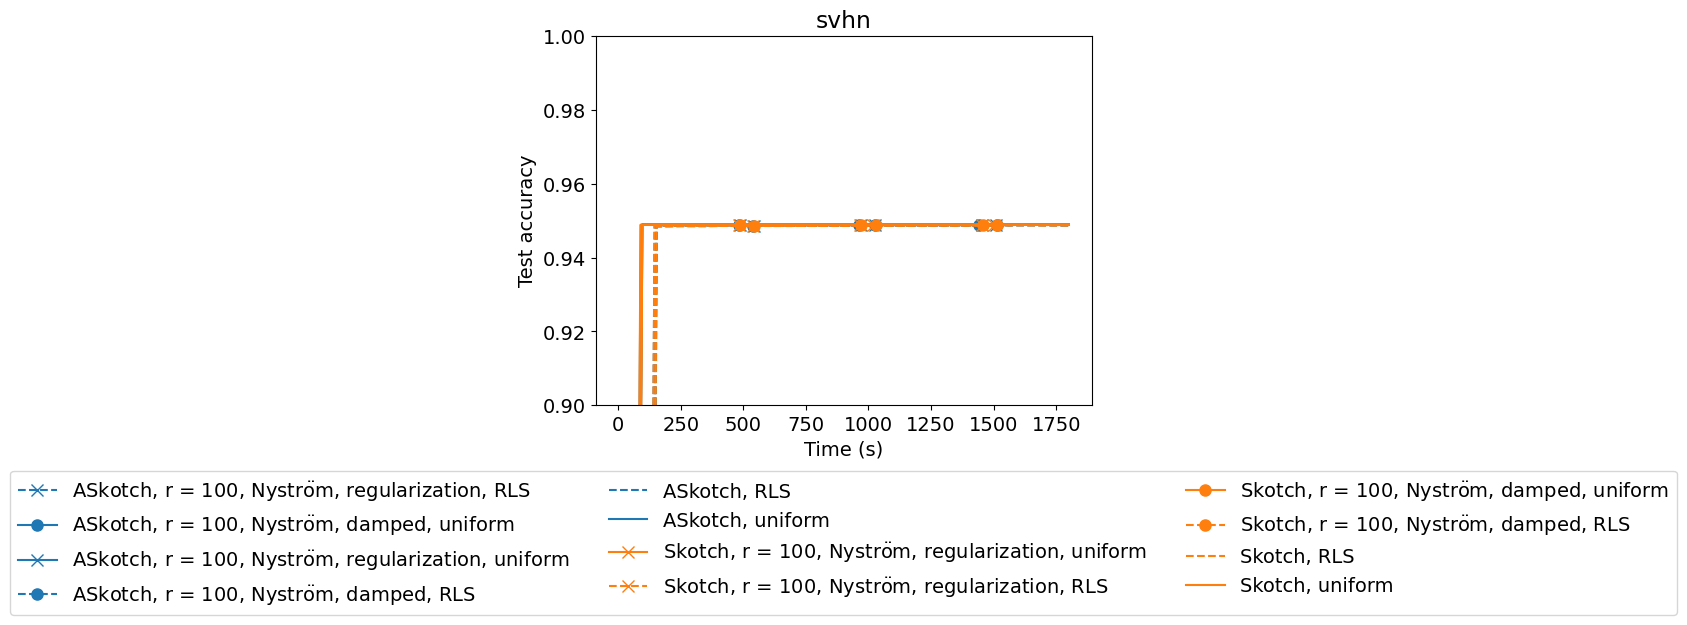

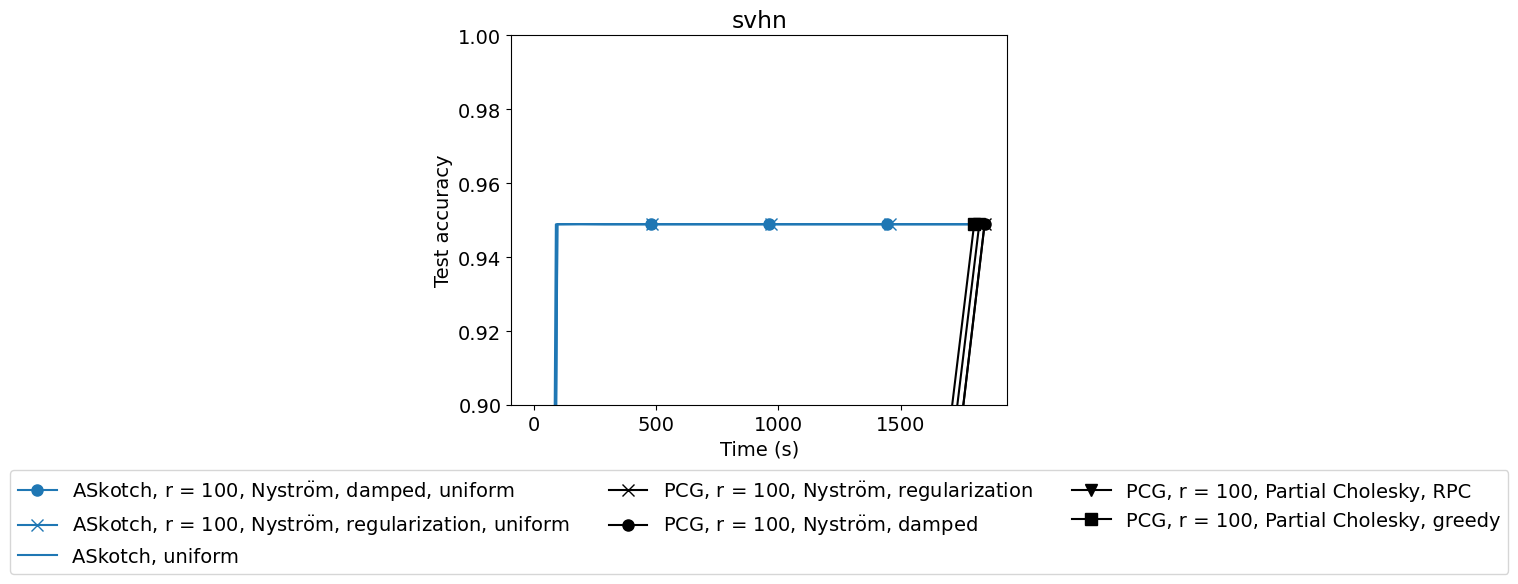

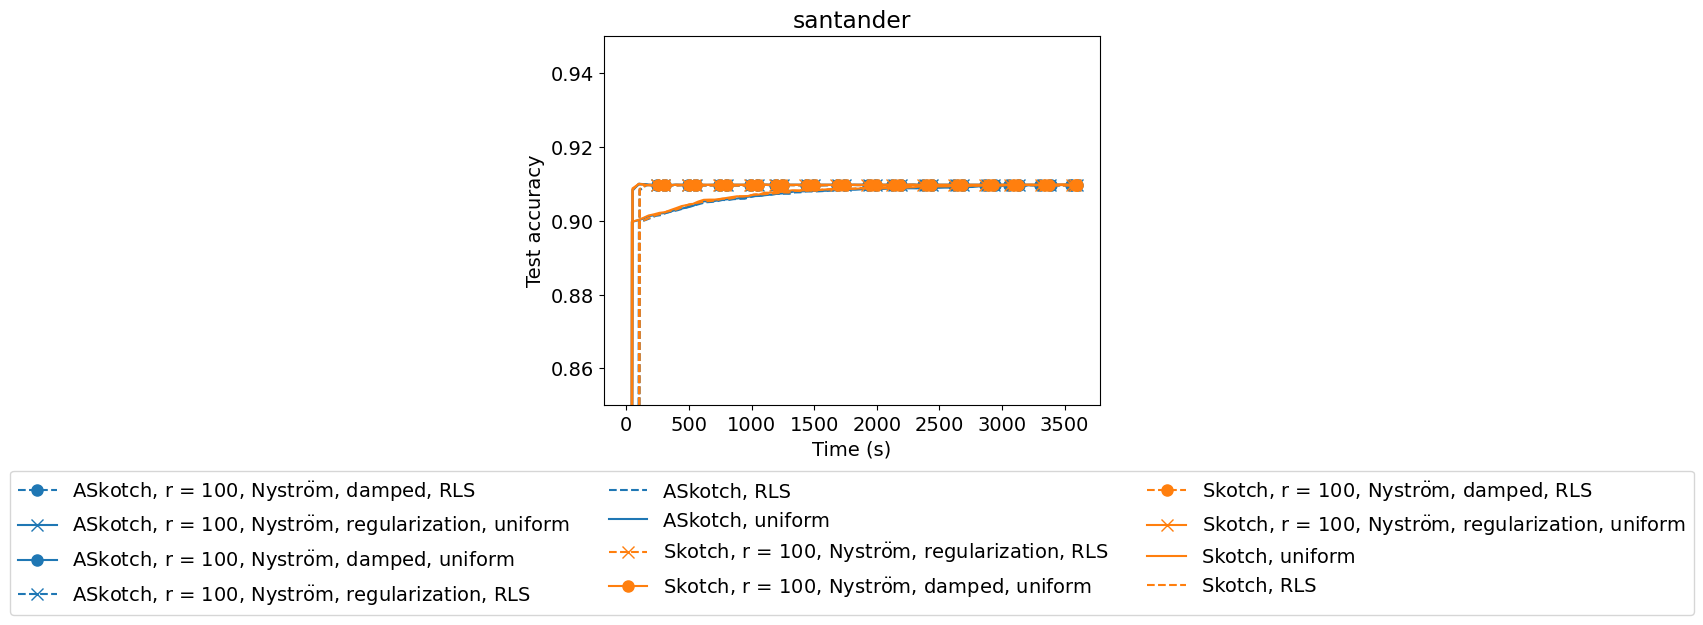

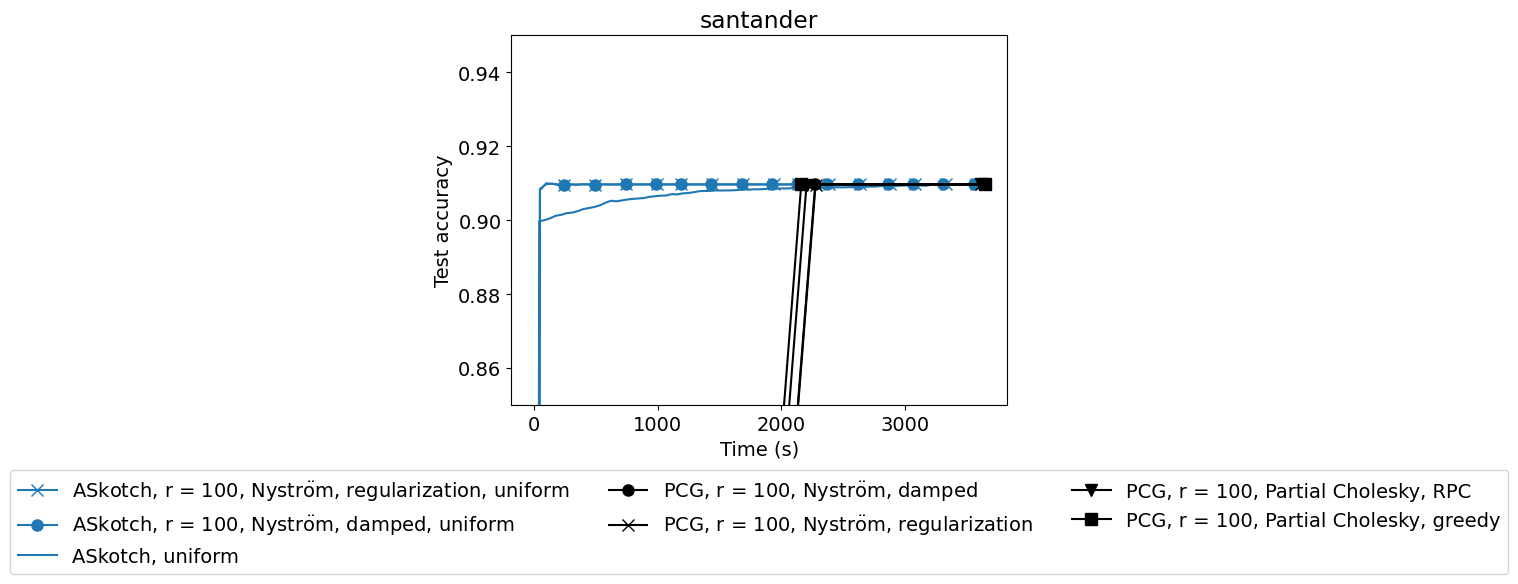

In [7]:
for dataset, plot_spec in datasets.items():
    plot_runs_dataset(entity_name, dataset, criteria1, criteria2, criteria3, hparams_to_label, plot_spec["metric"], x_axis, plot_spec["ylim1"], plot_spec["ylim2"])

In [8]:
# runs_filtered1 = filter_runs(runs_full_krr, criteria1)
# plot_runs(runs_filtered1, hparams_to_label, metric, x_axis, ylim1, dataset)

In [9]:
# runs_filtered2 = filter_runs(runs_full_krr, criteria2)
# runs_filtered3 = filter_runs(runs_full_krr, criteria3)
# plot_runs(runs_filtered2 + runs_filtered3, hparams_to_label, metric, x_axis, ylim2, dataset)